<p style="font-size:30px;font-weight:bold;text-align:center;color:black;">Recommender Systems</p>

<p style="font-size:20px;text-align:center;color:blue;">Master of foundation of Data Science</p>


<br>
<p style="font-size:20px;font-weight:bold;text-align:center;color:black;">Content Based Recommenders</p>



# Introduction

[Jester](http://eigentaste.berkeley.edu/about.html) is a joke recommender system developed at UC Berkeley to study social information filtering. Their [dataset](http://eigentaste.berkeley.edu/dataset/) contains over 5 million anonymous joke ratings from 150k users. In this case, we will use the **Dataset 1** which contains over 4.1 million 
continuous ratings (-10.00 to +10.00) of 100 jokes from 73,421 users, collected between April 1999 - May 2003.

http://eigentaste.berkeley.edu/about.html

An example of a joke in this dataset could be the next one (These jokes have been screened but if you are sensitive or under 18, please don't enter.): 


## Goal

The aim of this project is to learn how to apply different techniques in Recommender Systems. In particular, we will use:
<ul>
  <li>Content based</li>
</ul>

# Get the data  


In [1]:
import numpy as np
import pandas as pd
import random

In [2]:
df1 = pd.read_excel('data/jester-data-1.xls',header=None)
df2 = pd.read_excel('data/jester-data-2.xls',header=None)
df3 = pd.read_excel('data/jester-data-3.xls',header=None)  # very few jokes reviewed

df_original = pd.concat([df1,df2,df3])
# create an Id for each user
df_original.index = range(len(df_original))

In [3]:
# delete the first row, which only contained the number og items rated by user
df_original.drop(df_original.columns[[0]], axis=1, inplace=True)

#now df contains the ratings of each user to all movies (99 means not seen)
df_original.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


## We create two splits:
* Train set
* Test set

In [4]:
train_proportion = 0.75
MISSING_RATING = 99
NUM_SAMPLES = 1000  # fix to small value to speet up test
random.seed(1)

# Get a subsample datset of NUM_SAMPLES samples
df = df_original.sample(NUM_SAMPLES,random_state = 7)

# Divide the data into training and test set
train_df = pd.DataFrame(columns=df_original.columns.tolist())

# df.index are the NUM_SAMPLES id's of the users
train_set = pd.DataFrame(index=df.index,columns=['items','#items','ratings'])
test_set = pd.DataFrame(index=df.index,columns=['items','#items','ratings'])

# equivalence from users index (in dataframe) to positions (in matrix)
d = {}

i = 1 
for index,row in df.iterrows():
    # equivalence
    d[index] = i
    i += 1
   
    # delete items that where not rated by the user
    l = row[row!=MISSING_RATING]   
    # get 75% of the index for training and 25% for testing
    training_indexes = random.sample(list(l.index), int(train_proportion*(len(l))) )
    test_indexes = list(set(l.index) - set(training_indexes))
    
    # change the test indexes to unknown and append to the training df
    row[test_indexes] = MISSING_RATING
    train_df = train_df.append(row)
    
    # Assign the items to the datasets
    test_set['items'].loc[index] = test_indexes
    test_set['#items'].loc[index] = len(test_indexes)
    test_set['ratings'].loc[index] = l.loc[test_indexes].values
    train_set['items'].loc[index] = training_indexes
    train_set['#items'].loc[index] = len(training_indexes)
    train_set['ratings'].loc[index] = l.loc[training_indexes].values

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_df = train_df.append(row)
/tmp/ipykernel_1019/2405012962.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  train_d

In [5]:
test_set.head()

,items,#items,ratings
44157,"[5, 10, 11, 17, 21, 25, 34, 37, 38, 39, 45, 51...",25,"[-7.72, 7.82, 7.28, -6.6, -7.91, 7.91, -6.8, 8..."
5270,"[65, 35, 8, 40, 44, 15, 48, 18, 21, 53]",10,"[1.7, -9.13, 6.6, 1.17, -8.88, -2.23, 8.5, -3...."
50819,"[35, 7, 8, 16, 20, 21, 53, 29]",8,"[-0.19, 4.61, 5.44, 6.89, -6.41, 7.62, 6.21, 3..."
49702,"[65, 7, 15, 16, 18, 50, 53, 56]",8,"[8.98, -7.23, -6.84, -3.16, 7.52, 7.72, -0.34,..."
33127,"[32, 40, 11, 43, 45, 14, 48, 20, 21, 28, 62, 31]",12,"[0.29, 7.82, 7.62, 1.26, 9.22, 4.85, 9.17, 9.1..."


## Content Based Model

This model is based on item-item similarity. First, we read the text for each joke. Second, we 'clean' this text, and third, we describe each joke in a space of frequency of words in a BoW, representing each joke with a vector. Finally, we compute the similarity of the jokes in this space with again the cosinus distance, in order to have a new content-based similarity matrix. After that, we apply the prediction functions used above and we discuss the results.

## Get the jokes content
Read the data from html to dataframe preserving the same index for each joke than in previous experiments:

In [6]:
!pip install html2text

In [7]:
# from:
# http://blog.untrod.com/2016/06/simple-similar-products-recommendation-engine-in-python.html

import html2text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

def get_jokes_test():
    jokes = pd.DataFrame({'joke' : [],'id' : []})

    jokes = jokes.append({'joke' : '', 'id': 0}, ignore_index=True)
    for i in range(1, 101):
        with open("data/jokes/init"+str(i)+".html") as f:
            jokes = jokes.append({'joke' : html2text.html2text(f.read()), 'id': i},
                                 ignore_index=True)
    jokes.drop(0, axis=0, inplace=True)
    return jokes

jokes = get_jokes_test()

/tmp/ipykernel_1019/3351629579.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jokes = jokes.append({'joke' : '', 'id': 0}, ignore_index=True)
/tmp/ipykernel_1019/3351629579.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jokes = jokes.append({'joke' : html2text.html2text(f.read()), 'id': i},
/tmp/ipykernel_1019/3351629579.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jokes = jokes.append({'joke' : html2text.html2text(f.read()), 'id': i},
/tmp/ipykernel_1019/3351629579.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  jokes = jokes.append({'joke' : html2text.html2text(f.read()), 'id': i},
/tmp/ipykernel_1019/33516295

An overview and a specific example:

In [14]:
# overview
jokes.head()  # tail(15).values

,joke,id
1,"\nA man visits the doctor. The doctor says ""...",1.0
2,| \n\n \nThis couple had an excellent relati...,2.0
3,| \n\n \nQ. What's 200 feet long and has 4 t...,3.0
4,| \n\n \nQ. What's the difference between a ...,4.0
5,| \n\n \nQ. What's O. J. Simpson's Internet ...,5.0


In [15]:
# Specific example
print(jokes.loc[1]['joke'])

  
A man visits the doctor. The doctor says "I have bad news for you.You have
cancer and Alzheimer's disease".

The man replies "Well,thank God I don't have cancer!"




## Features extraction, engineering, and similarity matrix

In [18]:
from sklearn.metrics.pairwise import cosine_similarity

def similarity_matrix_content_base(jokes_df, min_df = 0.05, ngram_range=(1, 3), _use_linear_kernel: bool = False):
    """ This function takes a set of sentence and computes the similarity between them """
    tf = TfidfVectorizer(analyzer='word', ngram_range = ngram_range, min_df = min_df, stop_words='english')
    
    # get the representation of our data in the new space from raw text
    tfidf_matrix = tf.fit_transform(jokes_df['joke'])
    
    # compute the similaities between the senteces
    if _use_linear_kernel:
        sim = linear_kernel(tfidf_matrix, tfidf_matrix)
    else:
        sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
    return sim

#compute simiarlity between jokes
S_CB = similarity_matrix_content_base(jokes)

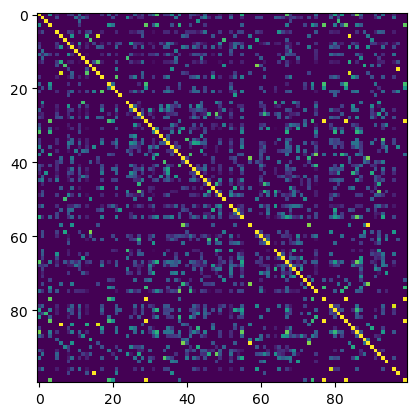

In [19]:
import matplotlib.pylab as plt
plt.imshow(S_CB)
plt.show()

#### Instead of using this linear kernel, it is better to use Cosine Distance to retrieve matrix similarity

In [11]:
#most similar joke to target_joke
target_joke = 1
print('******************    TARGET JOKE     *******************')
print(jokes.iloc[target_joke]['joke'])
print('****************** MOST SIMILAR JOKE  *******************')
print(jokes.iloc[np.argsort(-S_CB[target_joke,:])[1]]['joke'])

******************    TARGET JOKE     *******************
|  

  
This couple had an excellent relationship going until one day he came home
from work to find his girlfriend packing. He asked her why she was leaving him
and she told him that she had heard awful things about him.

"What could they possibly have said to make you move out?"

"They told me that you were a pedophile."

He replied, "That's an awfully big word for a ten year old."  
---|---


****************** MOST SIMILAR JOKE  *******************
  
|

  
Two kindergarten girls were talking outside: one said, "You won't believe what
I saw on the patio yesterday--a condom!"

The second girl asked, "What's a patio?"  
---|---




## Content-Based Model

In [26]:
train_set

,items,#items,ratings
44157,"[18, 73, 98, 9, 33, 16, 64, 58, 61, 84, 49, 27...",75,"[8.45, 8.54, -8.06, -7.57, 8.11, -9.47, -6.6, ..."
5270,"[50, 84, 86, 16, 59, 17, 51, 68, 32, 54, 27, 2...",27,"[-4.37, 0.58, 5.0, -9.32, -8.93, -0.49, 6.94, ..."
50819,"[81, 37, 18, 28, 36, 27, 48, 62, 32, 19, 87, 5...",21,"[5.73, -0.29, -7.04, 7.77, 7.91, 7.91, 7.62, 7..."
49702,"[68, 27, 42, 40, 17, 36, 29, 35, 69, 60, 55, 5...",22,"[5.78, 2.38, 1.26, 0.78, -8.16, 6.99, -4.71, 0..."
33127,"[57, 19, 13, 53, 26, 8, 12, 68, 7, 42, 5, 27, ...",34,"[-0.87, 5.24, 2.91, 8.01, 0.92, 3.3, 8.2, 6.84..."
...,...,...,...
10368,"[12, 6, 64, 49, 62, 70, 47, 80, 68, 13, 3, 44,...",54,"[6.07, -0.24, -3.64, 4.76, 5.97, -1.21, 2.57, ..."
36184,"[37, 13, 38, 27, 46, 17, 72, 9, 34, 45, 30, 48...",75,"[-9.81, -3.4, 3.11, 5.39, 2.04, -2.52, 0.1, -9..."
22268,"[26, 83, 27, 12, 65, 20, 13, 23, 11, 39, 42, 1...",34,"[3.11, 2.18, -6.94, -6.26, -3.79, -9.13, -8.83..."
38322,"[11, 57, 51, 56, 47, 34, 17, 48, 41, 67, 64, 1...",55,"[5.39, 8.83, 8.54, 0.53, 7.77, 5.0, -1.02, 4.0..."


### A Random CB recommender system

In [38]:
class random_CB():
    def __init__(self, X):
        self.Xtrain = X
        self.items = items = set([item for sublist in list(X['items'].values) for item in sublist])
    
    def fit(self,item_content):
        '''Fit method.. nothing to do in a random recommender'''
        pass
    
    def predict_score(self, user_id, item_id):
        '''Given a user_id and item_id predict it score'''
        return np.random.uniform(-10,10)
    
    def predict_top(self, user_id, at = 5):
        '''Given a user_id predict its top AT items'''
        predictions = []
        for item in self.items:
            if(item not in set(train_set.loc[user_id]['items'])):
                predictions.append((item,self.predict_score(user_id,item)))
        sorted_predictions = sorted(predictions, key=lambda x: x[1],reverse = True)[:at]
        return [i[0] for i in sorted_predictions]
    


### Exercice: Implement the methods  fit and predict from the class ContentBased recommender.

#### We need: 
- To define the similarity matrix in the fit method
- Given a user, to compute the score of a joke using the similarity with other joke AND the user preferences ( 

#### The model will be used as:
```python
cb_model = CB(train_set)
cb_model.fit(jokes)
evaluate(test_set, cb_model, at=5)
```

In [47]:
class CB():
    def __init__(self, X):
        self.Xtrain = X
        self.items = items = set([item for sublist in list(X['items'].values) for item in sublist])
        
    def fit(self, item_content) -> None:
        '''Learn Similarities between items'''
        self.similarities = similarity_matrix_content_base(jokes, _use_linear_kernel=False)
        return
        
    def predict_score(self, user_id, item_id) -> float:
        '''Given a user_id and item_id predict it score'''
        # we get the similarity vector of that item_id with the rest of them
        item_vector: np.ndarray = self.similarities[item_id - 1, :]
        user_preferences_df = self.Xtrain.loc[user_id]
        
        # now we construct the jokes ratings for that user (just taking the positive ones)
        user_vector: np.ndarray = np.zeros(item_vector.shape)
        for _i_joke in range(user_vector.shape[0]):
            try:
                _rating_idx = user_preferences_df['items'].index(_i_joke + 1)
                # then the user reviewed this joke
                _punctuation = user_preferences_df['ratings'][_rating_idx]
                if _punctuation > 0:
                    user_vector[_i_joke] = _punctuation
                else:
                    user_vector[_i_joke] = 0.
            except ValueError:
                user_vector[_i_joke] = 0.
        
        score: float = np.sum(item_vector * user_vector)
        return score
    
    def predict_top(self, user_id, at = 5):
        '''Given a user_id predict its top 5 items'''
        predictions = []
        for item in self.items:
            if(item not in set(train_set.loc[user_id]['items'])):
                predictions.append((item,self.predict_score(user_id,item)))
        sorted_predictions = sorted(predictions, key=lambda x: x[1],reverse = True)[:at]
        return [i[0] for i in sorted_predictions]
    
    
    
cb_model = CB(train_set)
cb_model.fit(jokes)
print(cb_model.predict_score(44157, 36))
print(cb_model.predict_top(44157))

59.288488103346836
[81, 10, 82, 53, 39]


### Exercice:  MODEL EVALUATION

In [48]:
def precision(recommended_items, relevant_items):
    
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    precision_score = np.sum(is_relevant, dtype=np.float32) / len(is_relevant)
    return precision_score

def recall(recommended_items, relevant_items):
    
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    recall_score = np.sum(is_relevant, dtype=np.float32) / relevant_items.shape[0]
    return recall_score

def AP(recommended_items, relevant_items):
   
    is_relevant = np.in1d(recommended_items, relevant_items, assume_unique=True)
    # Cumulative sum: precision at 1, at 2, at 3 ...
    p_at_k = is_relevant * np.cumsum(is_relevant, dtype=np.float32) / (1 + np.arange(is_relevant.shape[0]))
    ap_score = np.sum(p_at_k) / np.min([relevant_items.shape[0], is_relevant.shape[0]])
    return ap_score

# We pass as paramether the recommender class

def evaluate(test, recommender_object, at=5):
    
    cumulative_precision = 0.0
    cumulative_recall = 0.0
    cumulative_AP = 0.0
    num_eval = 0

    for user_id,row in test.iterrows():

        # Let's consider as relevant those jokes rated with score >5
        relevant_items = np.array(row['items'])[row['ratings']>5]
    
        if len(relevant_items)>0:
            
            recommended_items = recommender_object.predict_top(user_id, at=at)
            num_eval+=1

            cumulative_precision += precision(recommended_items, relevant_items)
            cumulative_recall += recall(recommended_items, relevant_items)
            cumulative_AP += AP(recommended_items, relevant_items)
            
    cumulative_precision /= num_eval
    cumulative_recall /= num_eval
    MAP = cumulative_AP / num_eval
    
    print("Recommender results are: Precision = {:.4f}, Recall = {:.4f}, MAP = {:.4f}".format(
        cumulative_precision, cumulative_recall, MAP)) 

In [49]:
# Train and evaluate the random model
print("*** RANDOM MODEL ***")
cb_random_model = random_CB(train_set)
cb_random_model.fit(jokes)
evaluate(test_set, cb_random_model, at=5)

# Train and evaluate the your model
print("*** YOUR MODEL ***")
cb_model = CB(train_set)
cb_model.fit(jokes)
evaluate(test_set, cb_model, at=5)

*** RANDOM MODEL ***
Recommender results are: Precision = 0.1179, Recall = 0.1110, MAP = 0.0882
*** YOUR MODEL ***
Recommender results are: Precision = 0.1547, Recall = 0.1530, MAP = 0.1196
